In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append("/home/hofmann/nngame/package/src/rlbase/")
from tqdm.notebook import tqdm

import misc,policy
import env_random_walk, env_gridworld
import agent_sarsa
import experiment_td_ctrl
import time

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

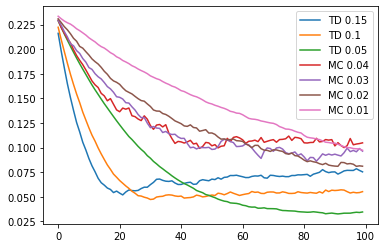

In [3]:
s0 = 3
N = 2*s0-1

env = env_random_walk.RandomWalkEnvironment(nmax=N)
pi = policy.DeterministicPolicy(env=env)

v_true = misc.evaluate_policy_linear_system(env,pi)
v_true = [v for v in v_true.values()]

gamma = 1

runs = 100
n_episodes = 100

legends = []
for alpha in tqdm([0.15,0.1,0.05,0.04,0.03,0.02,0.01]):
  e_mc = np.zeros((n_episodes,1))
  e_td = np.zeros((n_episodes,1))
  for run in tqdm(range(runs),leave=False):
    v_init = np.ones((N+2,1))*0.5
    v_mc = v_init.copy()
    v_td = v_init.copy()
        
    for i in range(n_episodes):
      s = s0
      episode = []
      while True:
        r, s_prime, terminal = env.step(s,0)
        episode += [(s,r)]
        if terminal:
          v_td[s] += alpha * (r - v_td[s] )
          break
        else:
          v_td[s] += alpha * (r + gamma * v_td[s_prime] - v_td[s])
        s = s_prime
      G = 0
      for (s,r) in episode[::-1]:
        G = gamma * G + r
        v_mc[s] += alpha * ( G - v_mc[s] )  
      e_mc[i] += (np.sum((v_mc[1:N+1]-v_true[1:N+1])**2))**.5/runs/5**.5
      e_td[i] += (np.sum((v_td[1:N+1]-v_true[1:N+1])**2))**.5/runs/5**.5
  if alpha>=0.05:
    plt.plot(e_td)
    legends += ["TD "+str(alpha)]
  else:
    plt.plot(e_mc)
    legends += ["MC "+str(alpha)]
plt.legend(tuple(legends))  

<IPython.core.display.Javascript object>


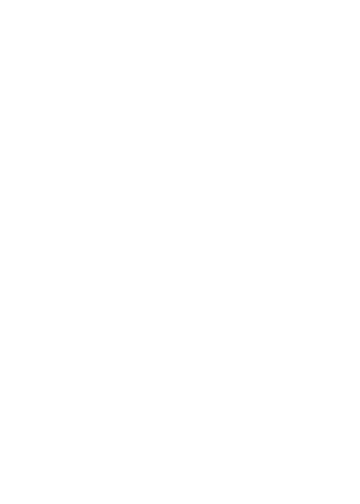

  7%|▋         | 340/5000 [00:25<05:45, 13.50it/s]


KeyboardInterrupt: 

In [4]:
%matplotlib notebook

env = env_gridworld.WindyGridworldEnvironment()
#env.add_diagonal()
#env.add_stay()

pi = policy.EpsGreedy(env=env,eps=0.1)

agent = agent_sarsa.SarsaAgent(env=env,pi=pi)
#agent = QlearningAgent(pi=p,env=env)

lens = []
timesteps = [0]
eee = []

import time

fig, _ = plt.subplots(6,2,figsize=(5,7))


def plot(i,episode):
  global lens, timesteps
  lens += [len(episode)]
  timesteps += [timesteps[-1]+len(episode)]
  if i%10==0:
    plt.clf()
    x = [a[0][0] for a in episode] + [env.terminal_states[0][0]]
    y = [a[0][1] for a in episode] + [env.terminal_states[0][1]]
   
    
    #result = misc.evaluate_policy_linear_system(env,agent.pi)
    #plt.imshow(np.transpose(env.reshape(result)),origin="upper")
    #plt.clim(-10,0)
    
    for idx, di in enumerate(["up","down","left","right"]):
        plt.subplot(6,2,idx+1)
        r = {s: agent.q[s][di] for s in env.states}
        plt.imshow(np.transpose(np.flip(env.reshape(r),axis=1)),origin="lower")
        plt.colorbar()
        plt.title(di)
    best_action = {k:misc.argmax(v) for (k,v) in agent.q.items()}
    
    arrow_length = .3
    
    plt.subplot(6,2,(5,8))
    for j in range(env.sx+1):
      plt.plot([j-.5,j-.5],[-.5,env.sy-.5],'k-')
    for j in range(env.sy+1):
      plt.plot([-.5,env.sx-.5],[j-.5,j-.5],'k-')
    for (k,v) in best_action.items():
      dx, dy = (0,0)
      if "right" in v:
        dx += arrow_length
      if "up" in v:
        dy += arrow_length
      if "left" in v:
        dx -= arrow_length
      if "down" in v:
        dy -= arrow_length
      plt.arrow(k[0],k[1],dx,dy,color="r",head_width=0.1)
    for xx in [3,4,5,5.95,6.05,6.95,7.05,8]:
      plt.plot([xx,xx],[0,6],dx,dy,color="b")
    plt.xlim(-.5,env.sx-.5)
    plt.ylim(-.5,env.sy-.5)
    plt.plot(env.start[0],env.start[1],"ob",markersize=12)
    plt.plot(env.terminal_states[0][0],env.terminal_states[0][1],"og",markersize=12)
    
    plt.subplot(6,2,(9,12))
    plt.plot(x,y,'-xk')
    for j in range(env.sx+1):
      plt.plot([j-.5,j-.5],[-.5,env.sy-.5],'k-')
    for j in range(env.sy+1):
      plt.plot([-.5,env.sx-.5],[j-.5,j-.5],'k-')
    for a in episode:
      dx, dy = (0,0)
      if "right" in a[1]:
        dx += arrow_length
      if "up" in a[1]:
        dy += arrow_length
      if "left" in a[1]:
        dx -= arrow_length
      if "down" in a[1]:
        dy -= arrow_length
      plt.arrow(a[0][0],a[0][1],dx,dy,color="r",head_width=0.1)
    for xx in [3,4,5,5.95,6.05,6.95,7.05,8]:
      plt.plot([xx,xx],[0,6],dx,dy,color="b")
    plt.xlim(-.5,env.sx-.5)
    plt.ylim(-.5,env.sy-.5)
    plt.plot(env.start[0],env.start[1],"ob",markersize=12)
    plt.plot(env.terminal_states[0][0],env.terminal_states[0][1],"og",markersize=12)
    
    fig.canvas.draw()
    time.sleep(0.1)
    
exp = experiment_td_ctrl.TD_CtrlExperiment(env=env,agent=agent,n_episodes=5000,callback=plot)
exp.train()

plt.figure()
plt.plot(timesteps,list(range(len(timesteps))))

In [ ]:
from env_gridworld import CliffGridworldEnvironment

env = CliffGridworldEnvironment()